# Blender import

If you want to load a chain from a blend file, use it and display it, you will need to import these libraries :

In [2]:
import ikpy
import numpy as np

from ikpy import plot_utils
%matplotlib notebook
import matplotlib.pyplot as plt

Now let's import the chain :

In [3]:
path = "../../resources/buggybot.blend"
endpoint = "armature/forearm_left_back/endpoint"
chain = ikpy.chain.Chain.from_blend_file(path, endpoint)

You need to specify the blend file's path, and the "endpoint".
As you may know, blender uses armatures to enable animations of a character, for example. The import uses armatures to build chains. 
The endpoint is a special name that points to the end of a blender bone.

Here, we asked to get the chain that contains all links of the armature called "armature" that are parents of the bone "forearm_left_back", and that ends at the endpoint of the bone.

In [4]:
chain.links

[Link name=armature,
 Link name=armature/shoulder_left_back/last,
 Link name=armature/arm_left_back/last,
 Link name=armature/forearm_left_back/last]

There are the links extracted. You can see that there is 4 links. The name of the links comes from the parent bone.

Now let's see where the foot is when the angles are 0, it will be useful for the inverse kinematics :

In [5]:
chain.forward_kinematics([0,0,0,0])[:3,3]

array([-102.57582755,   84.89105116, -204.65423402])

Let's also see what happens if the elbow makes an angle of 90deg :

<IPython.core.display.Javascript object>


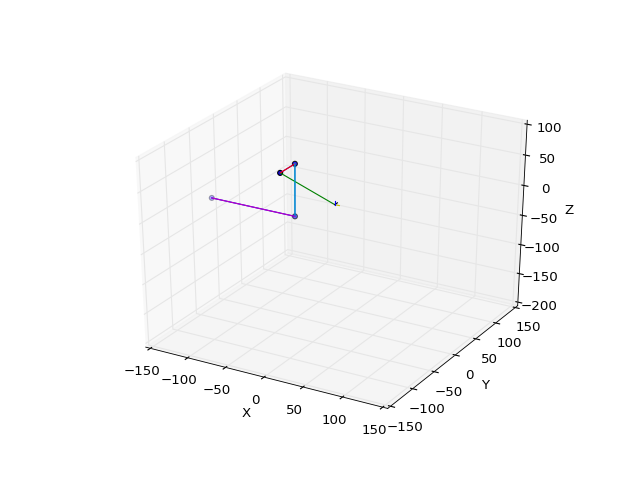

In [6]:
initial = [0,0,3.1415/2,0]

ax = plot_utils.init_3d_figure()
chain.plot(initial, ax)
ax.set_xlim3d([-150.0, 150.0])
ax.set_xlabel('X')
ax.set_ylim3d([-150.0, 150.0])
ax.set_ylabel('Y')
ax.set_zlim3d([-200.0, 100.0])
ax.set_zlabel('Z')

For this robot's design, it is better to use this pose as an initial condition for the inverse kinematics, sinec it may not find a good solution otherwise.

In [7]:
target = [-100, 100, -100]

target_matrix = np.eye(4)
target_matrix[:3,3] = target

ik = chain.inverse_kinematics(target_matrix, initial)

The inverse kinematics here basically ask for the robot to lift it's foot 100mm upward, compairing to the "zero" pose. Let's see the result :

<IPython.core.display.Javascript object>


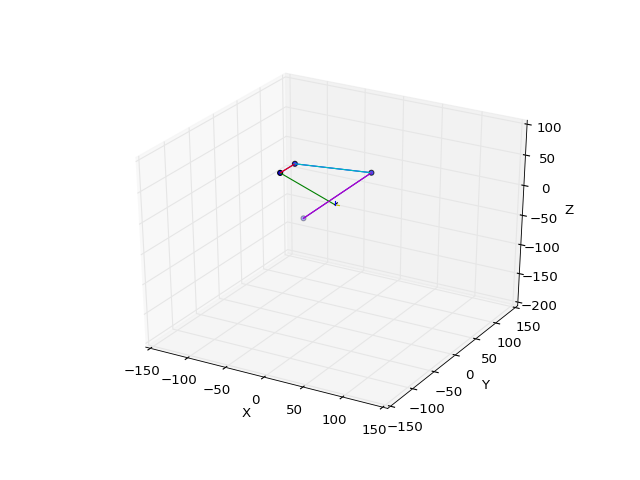

In [8]:
ax = plot_utils.init_3d_figure()
chain.plot(ik, ax)
ax.set_xlim3d([-150.0, 150.0])
ax.set_xlabel('X')
ax.set_ylim3d([-150.0, 150.0])
ax.set_ylabel('Y')
ax.set_zlim3d([-200.0, 100.0])
ax.set_zlabel('Z')